$$\color{#7D33FF}{Yennifer \ Yuliana \ Guerrero \ Uchima}$$

# Problema 1.

Usando el set `PS4_1.csv`, convertir la serie `Date` en el indice (serie de tiempo) y eliminar la serie `Unnamed: 1` (generado por pandas), retornar en una lista y en el siguiente orden:

    1.1) Cantidad de columnas
    1.2) Nombre de las columnas
    1.3) Número de registros no NaN de cada columna
    1.4) Cantidad total de memoria usada para cargar el set en el computador ( df.memory_usage() ).
    1.5) Estadística básica para cada columna, media, desviación estándar, máximo.
    1.6) Remplazar los NaN por None.


In [1]:
import pandas as pd
from numpy import array

path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTWsahNju_LTtJBjuaaILBx_3QutbzK-HCjGoLtrtcIBEu4rOQgdiz17AD8SDa13g/pub?output=csv"
df = pd.read_csv(path)

In [2]:
df.head()

,Date,Unnamed: 1,Berri1,Maisonneuve_1,Maisonneuve_2,Brebeuf
0,01/01/2009,0:00,29,20,35,NaN
1,02/01/2009,0:00,19,3,22,NaN
2,03/01/2009,0:00,24,12,22,NaN
3,04/01/2009,0:00,24,8,15,NaN
4,05/01/2009,0:00,120,111,141,NaN


In [3]:
forma = df.shape
cc = forma[1]     # Cantidad de columnas
nc = df.columns   # Nombre de las columnas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Unnamed: 1     365 non-null    object 
 2   Berri1         365 non-null    int64  
 3   Maisonneuve_1  365 non-null    int64  
 4   Maisonneuve_2  365 non-null    int64  
 5   Brebeuf        178 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 17.2+ KB


In [5]:
dic3 = {}
for col in df.columns:
    cn = pd.isnull(df[col])  # Hay NaN? retorna valores lógicos
    cnn = ~cn  # Cantidad de no NaN's
    dic3[col] = sum(cnn)
    
dic3

{'Date': 365,
 'Unnamed: 1': 365,
 'Berri1': 365,
 'Maisonneuve_1': 365,
 'Maisonneuve_2': 365,
 'Brebeuf': 178}

In [6]:
memoria =df.memory_usage()
memoriatotal=memoria.sum()
memoriatotal

17648

In [7]:
info_df = df.describe()  # Informacion de todo el DataFrame
info_df

,Berri1,Maisonneuve_1,Maisonneuve_2,Brebeuf
count,365.000000,365.000000,365.000000,178.000000
mean,2032.200000,1060.252055,2093.169863,2576.359551
std,1878.879799,1079.533086,1854.368523,2484.004743
min,0.000000,0.000000,0.000000,0.000000
25%,194.000000,90.000000,228.000000,0.000000
50%,1726.000000,678.000000,1686.000000,1443.500000
75%,3540.000000,1882.000000,3520.000000,4638.000000
max,6626.000000,4242.000000,6587.000000,7575.000000


Dado que las dos primeras columnas son datos de tipo no numérico (fecha y hora, respectivamente), entonces no es posible calcularle su media aritmética, la desviación estándar y el máximo valor.

In [8]:
dic5 = {}
for col in info_df.columns:
    dic5[col] = array([ info_df[col]['mean'],
                       info_df[col]['std'],
                       info_df[col]['max'] ])

dic5

{'Berri1': array([2032.2       , 1878.87979866, 6626.        ]),
 'Maisonneuve_1': array([1060.25205479, 1079.5330859 , 4242.        ]),
 'Maisonneuve_2': array([2093.16986301, 1854.36852309, 6587.        ]),
 'Brebeuf': array([2576.35955056, 2484.00474333, 7575.        ])}

In [9]:
dfr = df.fillna('none')
dfr.head()

,Date,Unnamed: 1,Berri1,Maisonneuve_1,Maisonneuve_2,Brebeuf
0,01/01/2009,0:00,29,20,35,none
1,02/01/2009,0:00,19,3,22,none
2,03/01/2009,0:00,24,12,22,none
3,04/01/2009,0:00,24,8,15,none
4,05/01/2009,0:00,120,111,141,none


In [10]:
dicf = {'1.1) Cantidad de columnas': cc,
        '1.2) Nombre de las columnas': nc,
        "1.3) Cantidad de no NaN's en las columnas": dic3,
        '1.4) Memoria en bits usada': memoriatotal,
        '1.5) Estadística básica de las columnas': dic5,
        "1.6) Reemplazando NaN's por none": dfr
       }

dicf["1.6) Reemplazando NaN's por none"].head()

,Date,Unnamed: 1,Berri1,Maisonneuve_1,Maisonneuve_2,Brebeuf
0,01/01/2009,0:00,29,20,35,none
1,02/01/2009,0:00,19,3,22,none
2,03/01/2009,0:00,24,12,22,none
3,04/01/2009,0:00,24,8,15,none
4,05/01/2009,0:00,120,111,141,none


# Problema 2

Realizar la lectura del data frame "Crimes_-_2019.csv" asociado a los crimenes que se presentaron en Chicago en el 2019. 


1. Ver la estadistica general del data frame.


In [11]:
path="https://docs.google.com/spreadsheets/d/e/2PACX-1vSMl_AFNVkGZ_dQJLpFOYY5NbdjUdqYCe5HfGfg6vgYhtWC9QN0NJRqy34uH7DJ0LakUU0IQ67YPfMW/pub?output=csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Primary Type,Date
0,0,DECEPTIVE PRACTICE,09/24/2019 08:00:00 AM
1,1,THEFT,10/13/2019 08:30:00 PM
2,2,THEFT,10/05/2019 06:30:00 PM
3,3,CRIMINAL DAMAGE,10/13/2019 07:00:00 PM
4,4,ASSAULT,10/13/2019 02:10:00 PM


In [12]:
dfc=df#copia del DataFrame

# 1. Estadística general del DataFrame
info_df = df.describe()
info_df

,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [13]:
info_df = df.describe(include=object)
info_df

,Primary Type,Date
count,1000,1000
unique,23,679
top,THEFT,10/13/2019 09:00:00 PM
freq,296,19


2. Dejar las columnas PrimaryType, y Date.

In [14]:
del df["Unnamed: 0"]
df

,Primary Type,Date
0,DECEPTIVE PRACTICE,09/24/2019 08:00:00 AM
1,THEFT,10/13/2019 08:30:00 PM
2,THEFT,10/05/2019 06:30:00 PM
3,CRIMINAL DAMAGE,10/13/2019 07:00:00 PM
4,ASSAULT,10/13/2019 02:10:00 PM
...,...,...
995,OTHER OFFENSE,10/14/2019 10:47:00 PM
996,BATTERY,10/14/2019 04:00:00 AM
997,THEFT,10/14/2019 10:25:00 AM
998,THEFT,10/14/2019 07:00:00 PM


3. Transformar la columna Date que es tipo string en una tipo Fecha, use el siguiente metodo de pandaspd.to_datetime(df.Date,format="%m/%d/%Y %I:%M:%S %p").



In [15]:
df.Date=pd.to_datetime(df.Date, format="%m/%d/%Y %I:%M:%S %p")[989]

4. Mostrar los casos totales para cada tipo de crimen de forma ascendente, emplee:

In [16]:
datos_info = df.groupby("Primary Type").Date.count().sort_values(ascending = True)
datos_info   # Serie

Primary Type
STALKING                               1
CONCEALED CARRY LICENSE VIOLATION      1
LIQUOR LAW VIOLATION                   2
PROSTITUTION                           2
SEX OFFENSE                            3
ARSON                                  3
OFFENSE INVOLVING CHILDREN             4
PUBLIC PEACE VIOLATION                 4
CRIM SEXUAL ASSAULT                    4
CRIMINAL SEXUAL ASSAULT                5
INTERFERENCE WITH PUBLIC OFFICER       6
CRIMINAL TRESPASS                     20
WEAPONS VIOLATION                     23
ROBBERY                               26
BURGLARY                              28
MOTOR VEHICLE THEFT                   29
NARCOTICS                             37
ASSAULT                               63
OTHER OFFENSE                         65
DECEPTIVE PRACTICE                    84
CRIMINAL DAMAGE                      112
BATTERY                              182
THEFT                                296
Name: Date, dtype: int64

5. Ordenar los valores por orden alfabetico de Primary type

In [17]:
dfo = dict(sorted(datos_info.items()))   # Ordenamos la serie usando la clave
pd.DataFrame([[key, dfo[key]] for key in dfo.keys()], columns=['Primary Type', 'Contador'])

,Primary Type,Contador
0,ARSON,3
1,ASSAULT,63
2,BATTERY,182
3,BURGLARY,28
4,CONCEALED CARRY LICENSE VIOLATION,1
5,CRIM SEXUAL ASSAULT,4
6,CRIMINAL DAMAGE,112
7,CRIMINAL SEXUAL ASSAULT,5
8,CRIMINAL TRESPASS,20
9,DECEPTIVE PRACTICE,84


6. Mostrar de la fila 100 a la 120

In [18]:
df[100:121]

,Primary Type,Date
100,INTERFERENCE WITH PUBLIC OFFICER,2019-10-14 15:40:00
101,OTHER OFFENSE,2019-10-14 15:40:00
102,BATTERY,2019-10-14 15:40:00
103,THEFT,2019-10-14 15:40:00
104,BATTERY,2019-10-14 15:40:00
105,DECEPTIVE PRACTICE,2019-10-14 15:40:00
106,DECEPTIVE PRACTICE,2019-10-14 15:40:00
107,BATTERY,2019-10-14 15:40:00
108,THEFT,2019-10-14 15:40:00
109,BATTERY,2019-10-14 15:40:00


7. Realizar una visualización de los datos anteriores.Emplee la libreria  seaborn con un grafico tipo barplot. Ej.
   ax = sns.barplot(x = "contador", y="Primary Type", data = datos)

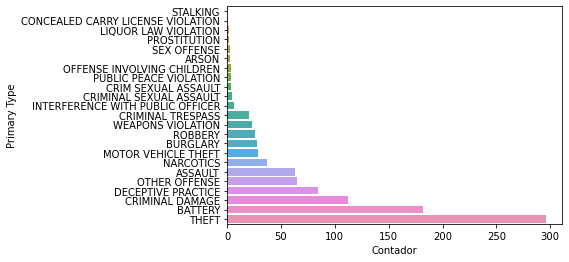

In [19]:
datos_info = datos_info.reset_index()   # Convertimos la serie en un DataFrame
datos_info = datos_info.rename(columns={"Date":"Contador"})   # Agregamos las columnas

import seaborn as sns

ax = sns.barplot(x = "Contador", y = "Primary Type", data = datos_info)

# Problema 3

1. Leer el dataset country_vaccinations.csv  y filtrar los datos para Colombia

In [20]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSfBl3kii5eJ2mhYt_jW-cSwiJwdNDgTXZcgiN_XeTd4e7b2MomSjJDwjpRliJ0yMkl8w31b0M4vsOS/pub?output=csv'
df3 = pd.read_csv(url)
df3.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [21]:
mas = df3['country'] == 'Colombia'   # Máscara para filtrar
cdf = df3[mas]
cdf.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
2006,Colombia,COL,2021-02-17,18.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
2007,Colombia,COL,2021-02-18,9935.0,NaN,NaN,9917.0,9917.0,0.02,NaN,NaN,195.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
2008,Colombia,COL,2021-02-19,21307.0,NaN,NaN,11372.0,10644.0,0.04,NaN,NaN,209.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
2009,Colombia,COL,2021-02-20,33140.0,NaN,NaN,11833.0,11041.0,0.07,NaN,NaN,217.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
2010,Colombia,COL,2021-02-21,39827.0,NaN,NaN,6687.0,9952.0,0.08,NaN,NaN,196.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...


2. Crear un csv con los datos para Colombia.

In [22]:
cdf.to_csv('colombia_vaccinations.csv')   # Exportamos los datos de Colombia a un archivo

3. Realizar una comparacion con los paises latinoamericanos. 

In [23]:
# Países latinoamericanos
pl = ["Argentina","Bolivia","Chile","Colombia","Costa Rica","Ecuador","El Salvador","Guatemala","Honduras","Mexico","Panama","Paraguay","Peru","Dominican Republic","Uruguay","Venezuela"]

df3 = df3.fillna(0.0)   # Cambiamos los NaN's por 0.0

'''
    Agrupamos los datos de las columnas por país y sacamos el promedio
    a las columnas con datos numéricos (total: 9)
'''
print('Promedio de los datos numéricos para los países latinoamericanos')
dp = df3.groupby(['country']).mean()
dp.loc[pl]

Promedio de los datos numéricos para los países latinoamericanos


,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
country,,,,,,,,,
Argentina,1.295636e+06,1.027796e+06,262419.019802,42547.089109,43569.673267,2.866931,2.273960,0.580594,964.039604
Bolivia,1.022338e+05,7.569179e+04,26312.871429,5178.971429,4818.385714,0.875571,0.649000,0.225857,412.785714
Chile,3.393392e+06,2.509703e+06,883689.609524,108530.019048,104797.647619,17.751429,13.129810,4.621619,5482.114286
Colombia,9.052713e+05,7.221486e+05,90149.320000,49593.060000,49701.820000,1.778600,1.419200,0.177600,976.880000
Costa Rica,2.916160e+04,1.937018e+04,9673.519231,0.000000,4426.750000,0.572404,0.380385,0.190096,868.980769
Ecuador,4.477692e+04,3.460504e+04,10171.881579,1645.157895,4017.750000,0.253816,0.196316,0.057895,227.750000
El Salvador,1.514346e+04,1.514346e+04,0.000000,779.740000,2931.440000,0.234000,0.234000,0.000000,452.060000
Guatemala,5.399226e+04,5.369081e+04,301.452381,2571.380952,2873.142857,0.301429,0.299524,0.002143,160.357143
Honduras,4.900457e+03,4.900457e+03,0.000000,613.428571,1390.771429,0.049429,0.049429,0.000000,140.457143


4. A través de máscaras determinar el número de países para los cuales la cantidad de vacunados está el intervalo [1.5E6, 2.0E6]

In [24]:
dp = df3.groupby(['country']).sum()  # Elaboramos la suma de todas las columnas numéricas
dp = dp['people_vaccinated']   # Tomar sólo los de la columna respectiva

''' Análisis del intervalo --> máscara '''
dp = dp[dp >= 1.5e6]
dp = dp[dp <= 2.0e6]

print('<< Total de personas completamente vacunadas para cada país >>')
pd.DataFrame(dp)

<< Total de personas completamente vacunadas para cada país >>


,people_vaccinated
country,
Barbados,1935605.0
Gibraltar,1570165.0
Jordan,1635561.0
Luxembourg,1829492.0
Malawi,1526557.0
Seychelles,1741078.0
Thailand,1797234.0
